In [5]:
from sympy import *
import sympy as s
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import style

style.use('default')

# 1. 최소값 구하기

- $f(x)=2*sin(x)+0.5*x$<br><br>
조건 : $-1 <= x <= 13$

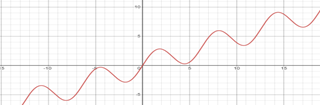

## 미분법 이용

In [7]:
def f(x):
    return 2*np.sin(x)+0.5*x

x0 = np.arange(-1, 13, 0.1) # x범위지정
y0 = f(x0) # y는 f(x)에 x를 대입한 결괏값

# 원함수의 최솟값 min(y0)
# np.where 함수를 이용하여 y가 최솟값이 되는 x의 위치를 찾고, 
# 그 인덱스를 x0 array에 대입하여 값을 가져옴
print(f'f(x)는 x가 {x0[np.where(y0 == min(y0))]}일 때 최솟값 {min(y0)}을 가진다')

f(x)는 x가 [-1.]일 때 최솟값 -2.182941969615793을 가진다


## 뉴톤법 이용
조건 : 초기값 $x=13$

In [15]:
import sympy as sp

In [16]:
x = symbols('x')

f_x = 2*sp.sin(x)+0.5*x # 원함수
fp_x = diff(f_x) 

x_init = 13 # 초기값 지정
Tol = 0.001 # 허용오차

x_t = x_init
i = 0

while True: # 오차값이 허용오차 이내일때까지 반복한다
    i = i + 1
    
    # x, f(x)를 지나는 접선의 x절편을 구한다.
    # 함수이름.subs(a, b)는 a에 b를 대입하겠다는 뜻이다
    x_tp1 = float(x_t) - float(f_x.subs(x,x_t))/float(fp_x.subs(x,x_t))
    
    # x값을 접선의 x절편으로 변경한다.
    error = f_x.subs(x, x_tp1) 

    if error <= Tol: # 오차값이 0이라고 해도 될 정도로 작은 값이라면 종료한다(허용오차이내)
        break
    x_t = x_tp1

print(f'반복 횟수: {i}')
print(f'근사해 x = {x_tp1}')
print(f'근사해일 때 최솟값 : {f_x.subs(x,x_tp1)}')

반복 횟수: 19
근사해 x = -1.7841324780697434
근사해일 때 최솟값 : -2.84672627816063


## 경사하강법 이용
- 조건 : 초기값 $x=13$
- 학습율 = 최소값을 찾을 수 있도록 조절

In [6]:
def f(x):
    return  2*np.sin(x)+0.5*x

In [7]:
x0 = 13 # 초기값 지정

learning_rate = 0.1 # 학습률 지정 ( 단계마다 x를 이동시켜줄 거리 )
max_iter = 20 # 알고리즘 반복 횟수 지정

In [9]:
# 알고리즘 구현 및 실행
# 학습률이 작아 그래프의 굴곡을 벗어나지 못한다.
 
print("step \t x \t \t f(x)")
print("{:02d} \t {:6.5f} \t {:6.5f}".format(0, x0, f(x0)))

for i in range(max_iter):
    x1 = x0 - learning_rate * f(x0)
    x0 = x1
    print()
    print("{:02d} \t {:6.5f} \t {:6.5f}".format(i+1, x0, f(x0)))

step 	 x 	 	 f(x)
00 	 13.00000 	 7.34033

01 	 12.26597 	 5.54117

02 	 11.71185 	 4.34741

03 	 11.27711 	 3.71729

04 	 10.90538 	 3.46082

05 	 10.55930 	 3.46699

06 	 10.21260 	 3.68866

07 	 9.84373 	 4.10826

08 	 9.43291 	 4.70020

09 	 8.96289 	 5.37273

10 	 8.42561 	 5.89484

11 	 7.83613 	 5.91775

12 	 7.24436 	 5.26190

13 	 6.71816 	 4.20187

14 	 6.29798 	 3.17857

15 	 5.98012 	 2.39317

16 	 5.74080 	 1.83805

17 	 5.55700 	 1.45045

18 	 5.41195 	 1.17573

19 	 5.29438 	 0.97645

20 	 5.19674 	 0.82841
